In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('ola.csv')
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,20-01-2011 00:00,1,0,1,1,10.66,11.365,56,26.0027,3,13
1,20-01-2011 01:00,1,0,1,1,10.66,13.635,56,0.0000,8,32
2,20-01-2011 02:00,1,0,1,1,10.66,13.635,56,0.0000,5,27
3,20-01-2011 03:00,1,0,1,1,10.66,12.880,56,11.0014,3,10
4,20-01-2011 04:00,1,0,1,1,10.66,12.880,56,11.0014,0,1


In [4]:
df.shape


(6493, 11)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
 9   casual      6493 non-null   int64  
 10  registered  6493 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 558.1+ KB


In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
season,6493.0,2.493300,1.091258,1.00,2.0000,3.0000,3.0000,4.0000
holiday,6493.0,0.029108,0.168123,0.00,0.0000,0.0000,0.0000,1.0000
workingday,6493.0,0.685815,0.464226,0.00,0.0000,1.0000,1.0000,1.0000
weather,6493.0,1.436778,0.648390,1.00,1.0000,1.0000,2.0000,4.0000
temp,6493.0,20.620607,8.059583,0.82,13.9400,21.3200,27.0600,40.1800
atemp,6493.0,24.012865,8.782741,0.00,16.6650,25.0000,31.0600,50.0000
humidity,6493.0,64.125212,19.293391,16.00,49.0000,65.0000,81.0000,100.0000
windspeed,6493.0,12.631157,8.250151,0.00,7.0015,11.0014,16.9979,55.9986
casual,6493.0,26.122902,37.785968,0.00,3.0000,11.0000,33.0000,272.0000
registered,6493.0,117.328200,110.554638,0.00,27.0000,92.0000,170.0000,579.0000


In [7]:
parts = df["datetime"].str.split(" ", n=2, expand=True)
df["date"] = parts[0]
df["time"] = parts[1].str[:2].astype('int')
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,time
0,20-01-2011 00:00,1,0,1,1,10.66,11.365,56,26.0027,3,13,20-01-2011,0
1,20-01-2011 01:00,1,0,1,1,10.66,13.635,56,0.0000,8,32,20-01-2011,1
2,20-01-2011 02:00,1,0,1,1,10.66,13.635,56,0.0000,5,27,20-01-2011,2
3,20-01-2011 03:00,1,0,1,1,10.66,12.880,56,11.0014,3,10,20-01-2011,3
4,20-01-2011 04:00,1,0,1,1,10.66,12.880,56,11.0014,0,1,20-01-2011,4


In [8]:
parts = df["date"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,time,day,month,year
0,20-01-2011 00:00,1,0,1,1,10.66,11.365,56,26.0027,3,13,20-01-2011,0,20,1,2011
1,20-01-2011 01:00,1,0,1,1,10.66,13.635,56,0.0000,8,32,20-01-2011,1,20,1,2011
2,20-01-2011 02:00,1,0,1,1,10.66,13.635,56,0.0000,5,27,20-01-2011,2,20,1,2011
3,20-01-2011 03:00,1,0,1,1,10.66,12.880,56,11.0014,3,10,20-01-2011,3,20,1,2011
4,20-01-2011 04:00,1,0,1,1,10.66,12.880,56,11.0014,0,1,20-01-2011,4,20,1,2011


In [9]:
from datetime import datetime
import calendar


def weekend_or_weekday(year, month, day):

	d = datetime(year, month, day)
	if d.weekday() > 4:
		return 0
	else:
		return 1


df['weekday'] = df.apply(lambda x:
						weekend_or_weekday(x['year'],
											x['month'],
											x['day']),
						axis=1)
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,time,day,month,year,weekday
0,20-01-2011 00:00,1,0,1,1,10.66,11.365,56,26.0027,3,13,20-01-2011,0,20,1,2011,1
1,20-01-2011 01:00,1,0,1,1,10.66,13.635,56,0.0000,8,32,20-01-2011,1,20,1,2011,1
2,20-01-2011 02:00,1,0,1,1,10.66,13.635,56,0.0000,5,27,20-01-2011,2,20,1,2011,1
3,20-01-2011 03:00,1,0,1,1,10.66,12.880,56,11.0014,3,10,20-01-2011,3,20,1,2011,1
4,20-01-2011 04:00,1,0,1,1,10.66,12.880,56,11.0014,0,1,20-01-2011,4,20,1,2011,1


In [10]:
def am_or_pm(x):
	if x > 11:
		return 1
	else:
		return 0


df['am_or_pm'] = df['time'].apply(am_or_pm)
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,time,day,month,year,weekday,am_or_pm
0,20-01-2011 00:00,1,0,1,1,10.66,11.365,56,26.0027,3,13,20-01-2011,0,20,1,2011,1,0
1,20-01-2011 01:00,1,0,1,1,10.66,13.635,56,0.0000,8,32,20-01-2011,1,20,1,2011,1,0
2,20-01-2011 02:00,1,0,1,1,10.66,13.635,56,0.0000,5,27,20-01-2011,2,20,1,2011,1,0
3,20-01-2011 03:00,1,0,1,1,10.66,12.880,56,11.0014,3,10,20-01-2011,3,20,1,2011,1,0
4,20-01-2011 04:00,1,0,1,1,10.66,12.880,56,11.0014,0,1,20-01-2011,4,20,1,2011,1,0


In [11]:
from datetime import date
import holidays


def is_holiday(x):

	india_holidays = holidays.country_holidays('IN')

	if india_holidays.get(x):
		return 1
	else:
		return 0


df['holidays'] = df['date'].apply(is_holiday)
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,time,day,month,year,weekday,am_or_pm,holidays
0,20-01-2011 00:00,1,0,1,1,10.66,11.365,56,26.0027,3,13,20-01-2011,0,20,1,2011,1,0,0
1,20-01-2011 01:00,1,0,1,1,10.66,13.635,56,0.0000,8,32,20-01-2011,1,20,1,2011,1,0,0
2,20-01-2011 02:00,1,0,1,1,10.66,13.635,56,0.0000,5,27,20-01-2011,2,20,1,2011,1,0,0
3,20-01-2011 03:00,1,0,1,1,10.66,12.880,56,11.0014,3,10,20-01-2011,3,20,1,2011,1,0,0
4,20-01-2011 04:00,1,0,1,1,10.66,12.880,56,11.0014,0,1,20-01-2011,4,20,1,2011,1,0,0


In [12]:
df.drop(['datetime', 'date'],
		axis=1,
		inplace=True)


In [13]:
df.isnull().sum()


season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
time          0
day           0
month         0
year          0
weekday       0
am_or_pm      0
holidays      0
dtype: int64

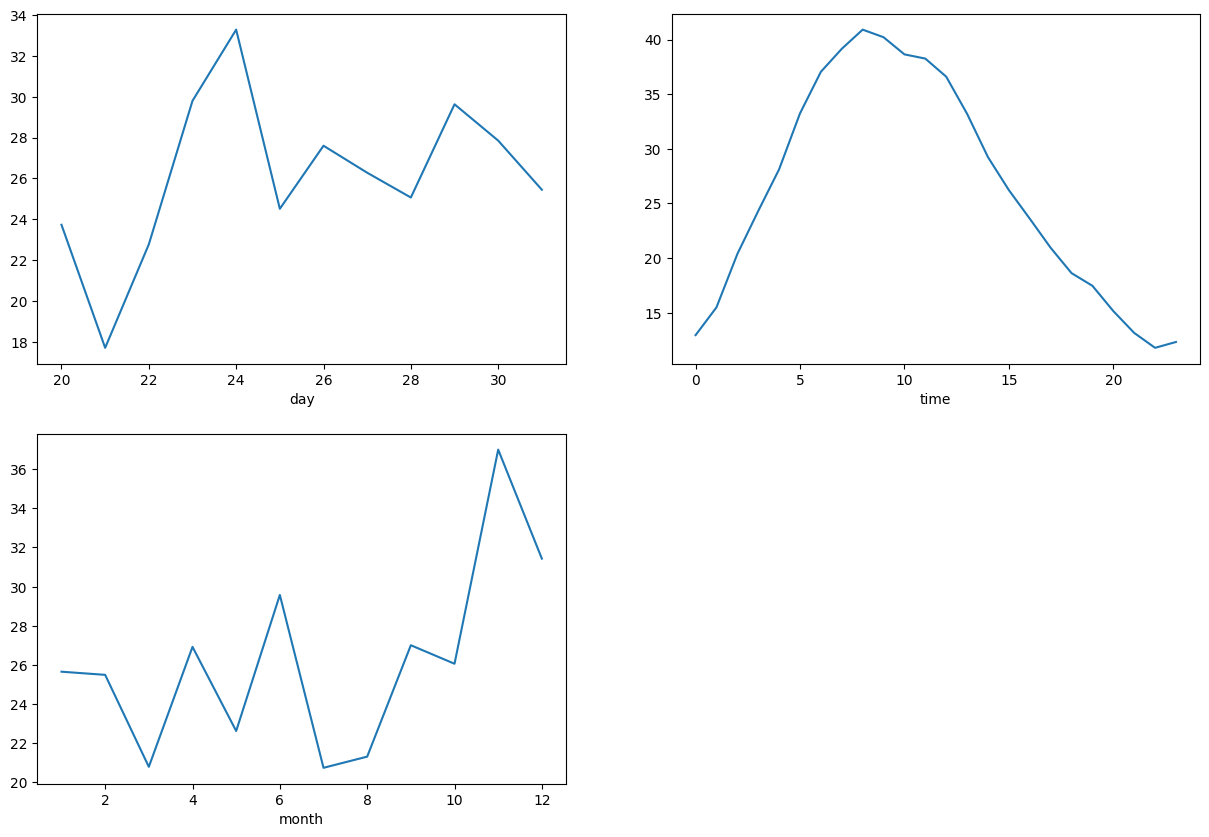

In [15]:
features = ['day', 'time', 'month']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
	plt.subplot(2, 2, i + 1)
	df.groupby(col).mean()['casual'].plot()
plt.show()



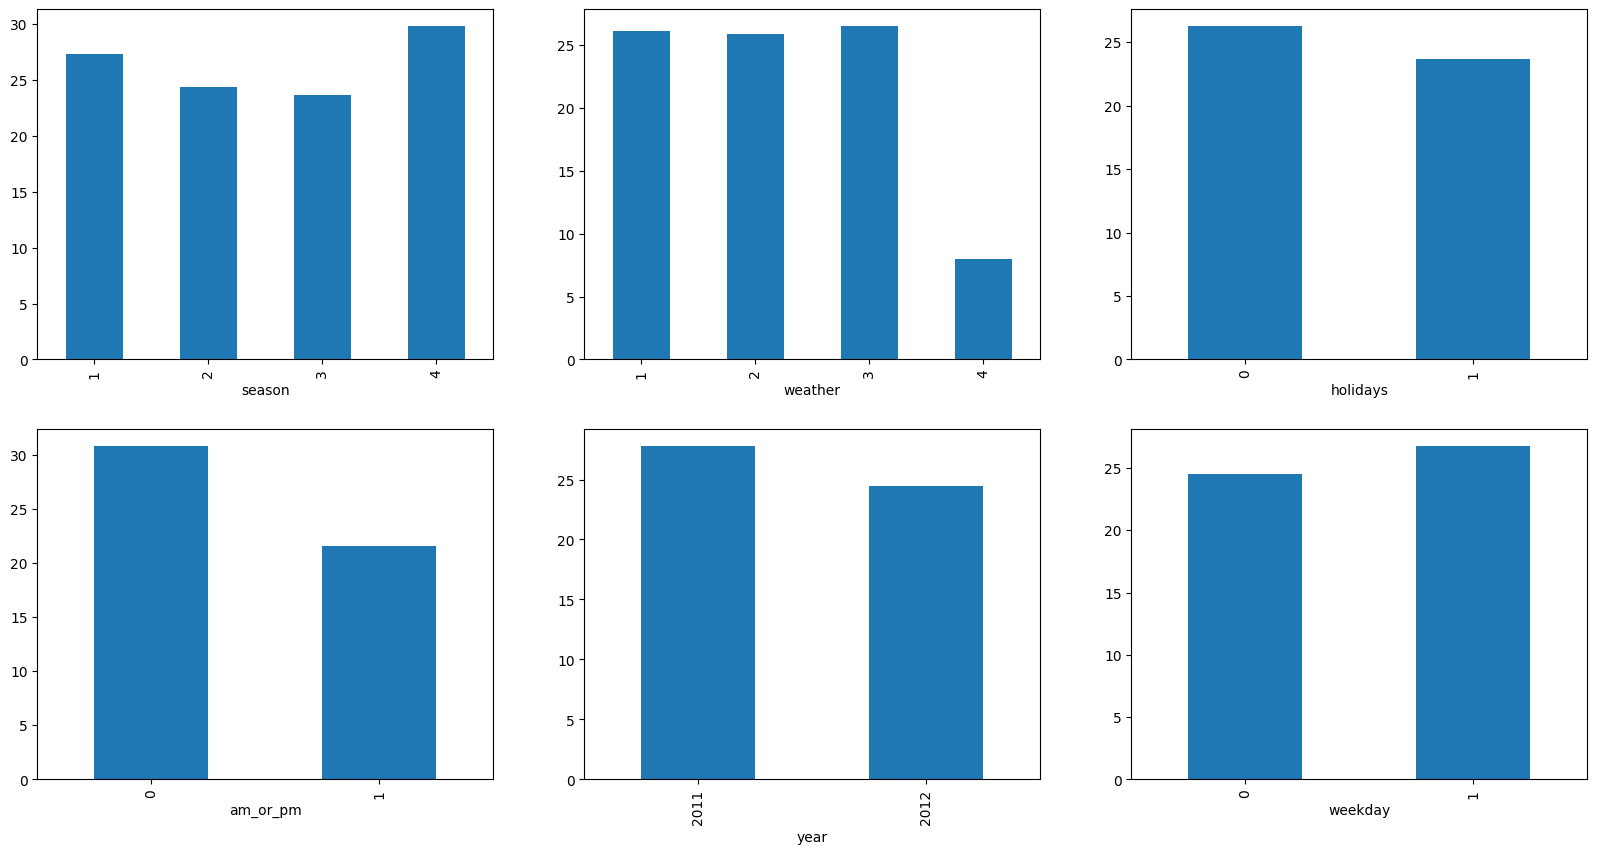

In [17]:
features = ['season', 'weather', 'holidays',
			'am_or_pm', 'year', 'weekday']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(2, 3, i + 1)
	df.groupby(col).mean()['casual'].plot.bar()
plt.show()


In [19]:
num_rows = df.shape[0] - df[df['windspeed']<32].shape[0]
print(f'Number of rows that will be lost if we remove outliers is equal to {num_rows}.')


Number of rows that will be lost if we remove outliers is equal to 115.


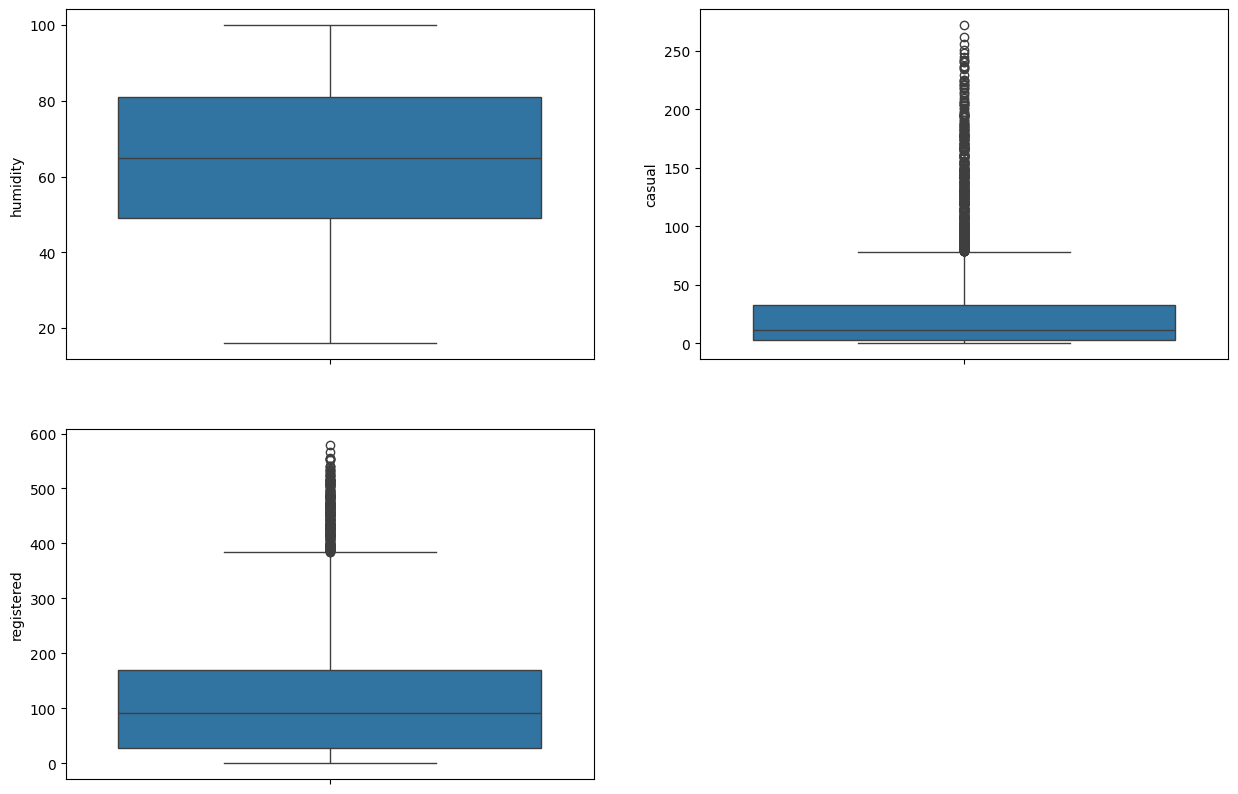

In [20]:
features = ['humidity', 'casual', 'registered']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
	plt.subplot(2, 2, i + 1)
	sb.boxplot(df[col])
plt.show()


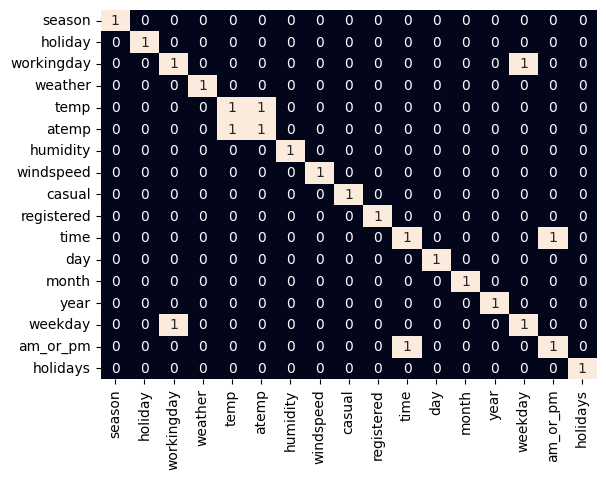

In [21]:
sb.heatmap(df.corr() > 0.8,
		annot=True,
		cbar=False)
plt.show()


In [22]:
df.drop(['registered', 'time'], axis=1, inplace=True)
df = df[(df['windspeed'] < 32) & (df['humidity'] > 0)]


In [23]:
features = df.drop(['casual'], axis=1)
target = df['casual'].values

X_train, X_val, Y_train, Y_val = train_test_split(features,
												target,
												test_size = 0.1,
												random_state=22)
X_train.shape, X_val.shape


((5740, 14), (638, 14))

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [25]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(), Lasso(),
		RandomForestRegressor(), Ridge()]

for i in range(5):
	models[i].fit(X_train, Y_train)

	print(f'{models[i]} : ')

	train_preds = models[i].predict(X_train)
	print('Training Error : ', mae(Y_train, train_preds))

	val_preds = models[i].predict(X_val)
	print('Validation Error : ', mae(Y_val, val_preds))
	print()


LinearRegression() : 
Training Error :  25.202372870067634
Validation Error :  25.348794952213535

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Error :  8.479851343170886
Validation Error :  14.589570494748209

Lasso() : 
Training Error :  25.3388207495893
Validation Error :  25.540189